In [144]:
# std
import os
import sys
import inspect
import time
import pathlib
import glob
from math import sqrt
from math import log2
# packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
np.set_printoptions(suppress=True)
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter


# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.regression_plotfunctions import *



In [145]:
def plot_CV_with_Std(df, y = "R2_score", regressor = "sklearn", titel = "score vs stabdartdeviation", SaveName = False):
    kmax  = np.max(df["k"])
    list_k = np.linspace(1, kmax, num=kmax)
    std_list = np.zeros(kmax)
    mean_list = np.zeros(kmax)
    for k in list_k:
        df_tmp = df[df["k"] == k]
        std_list[int(k-1)] = np.std(df_tmp[y])
        mean_list[int(k-1)] = np.mean(df_tmp[y])
    plt.semilogy(list_k, np.array(mean_list), '-', label = regressor)

    plt.ylim(0.6, 1)
    plt.legend(loc="best")
    plt.xlabel("k-splits")
    plt.title(titel)
    plt.ylabel(y)
    #print(std_list)
    if SaveName:
        plt.savefig(SaveName)

In [146]:
def plot_TTS(df, y = "R2_score", regressor = "sklearn", titel = "score vs standartdeviation", SaveName = False):

    plt.plot(df, mean_list, '-', label = regressor)
    plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid()
    plt.legend()
    plt.xlabel("k-splits")
    plt.title(titel)
    plt.ylabel(y)
    if SaveName:
        plt.savefig(SaveName)

In [147]:
def plotTrainTimes(data, labels, title="", fileName="no name"):
    for i in range(len(data)):
        plt.plot(data[i], label=labels[i])

    plt.title(title)
    plt.legend()
    plt.ylabel("time [s]")
    plt.xlabel("split")
    plt.savefig(fileName)
    plt.show()


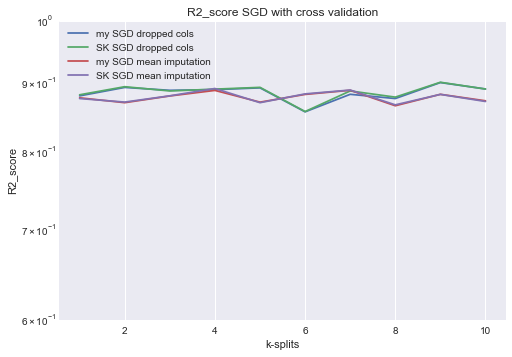

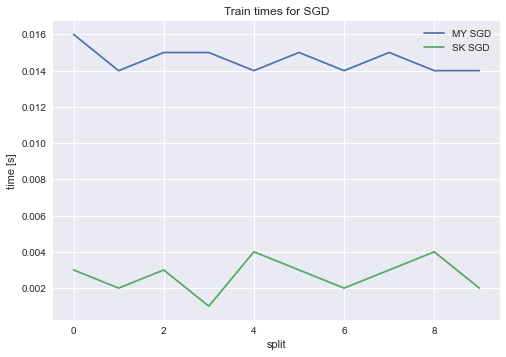

In [148]:
df_my_CV_SGD_dropped = pd.read_csv("out/SGD/my_CV_SGD_dropped.csv")
df_sk_CV_SGD_dropped = pd.read_csv("out/SGD/sklearn_CV_SGD_dropped.csv")

df_my_CV_SGD_mean = pd.read_csv("out/SGD/my_CV_SGD_mean.csv")
df_sk_CV_SGD_mean= pd.read_csv("out/SGD/sklearn_CV_SGD_mean.csv")
df_list = [df_my_CV_SGD_dropped, df_sk_CV_SGD_dropped, df_my_CV_SGD_mean, df_sk_CV_SGD_mean]

mpl.style.use('seaborn')
plot_CV_with_Std(df_sk_CV_SGD_dropped,y = "R2_score",regressor = "my SGD dropped cols",titel="R2_score SGD")
plot_CV_with_Std(df_my_CV_SGD_dropped,y = "R2_score",regressor = "SK SGD dropped cols",titel="R2_score SGD")

plot_CV_with_Std(df_sk_CV_SGD_mean,y = "R2_score",regressor = "my SGD mean imputation",titel="R2_score SGD with cross validation")
plot_CV_with_Std(df_my_CV_SGD_mean,y = "R2_score",regressor = "SK SGD mean imputation",titel="R2_score SGD with cross validation")

plt.savefig("out/CV_Plot_my_vs_sklearn_SGD_R2")
plt.show()

train_times = [df_my_CV_SGD_mean["train_time"], df_sk_CV_SGD_mean["train_time"]]
labels = ["MY SGD", "SK SGD"]
plotTrainTimes(train_times, labels, title="Train times for SGD", fileName="out/SGD/times_sgd")

# KNN

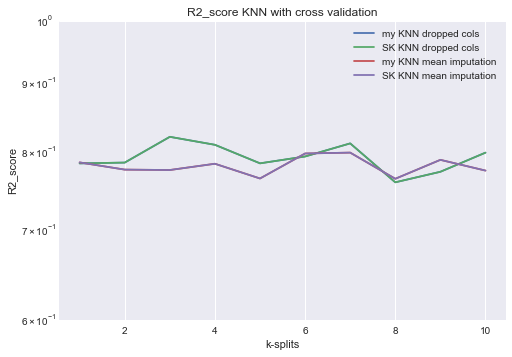

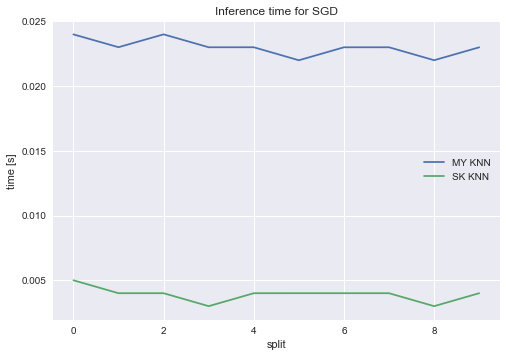

In [149]:
df_my_CV_KNN_dropped = pd.read_csv("out/KNN/my_CV_KNN_dropped.csv")
df_sk_CV_KNN_dropped = pd.read_csv("out/KNN/sklearn_CV_KNN_dropped.csv")

df_my_CV_KNN_mean = pd.read_csv("out/KNN/my_CV_KNN_mean.csv")
df_sk_CV_KNN_mean= pd.read_csv("out/KNN/sklearn_CV_KNN_mean.csv")

mpl.style.use('seaborn')
plot_CV_with_Std(df_sk_CV_KNN_dropped,y = "R2_score",regressor = "my KNN dropped cols",titel="R2_score KNN")
plot_CV_with_Std(df_my_CV_KNN_dropped,y = "R2_score",regressor = "SK KNN dropped cols",titel="R2_score KNN")

plot_CV_with_Std(df_sk_CV_KNN_mean,y = "R2_score",regressor = "my KNN mean imputation",titel="R2_score KNN with cross validation")
plot_CV_with_Std(df_my_CV_KNN_mean,y = "R2_score",regressor = "SK KNN mean imputation",titel="R2_score KNN with cross validation")

plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_KNN_R2")
plt.show()



train_times = [df_my_CV_KNN_mean["inference_time"], df_sk_CV_KNN_mean["inference_time"]]
labels = ["MY KNN", "SK KNN"]
plotTrainTimes(train_times, labels, title="Inference time for SGD", fileName="out/KNN/times_knn")

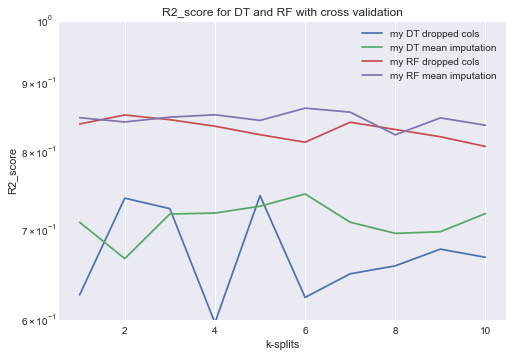

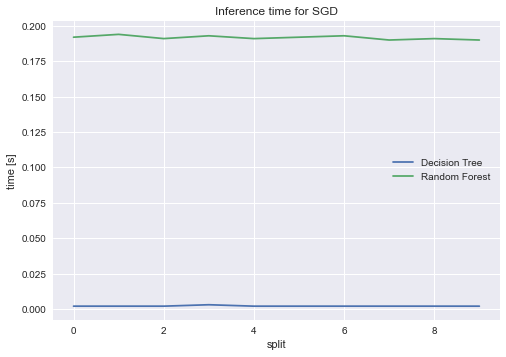

In [151]:
df_sk_CV_DT_dropped = pd.read_csv("out/DT/sklearn_CV_DT_dropped.csv")
df_sk_CV_DT_mean= pd.read_csv("out/DT/sklearn_CV_DT_mean.csv")

df_sk_CV_RF_dropped = pd.read_csv("out/RF/sklearn_CV_RF_dropped.csv")
df_sk_CV_RF_mean= pd.read_csv("out/RF/sklearn_CV_RF_mean.csv")

mpl.style.use('seaborn')
plot_CV_with_Std(df_sk_CV_DT_dropped,y = "R2_score",regressor = "my DT dropped cols",titel="R2_score DT")
plot_CV_with_Std(df_sk_CV_DT_mean,y = "R2_score",regressor = "my DT mean imputation",titel="R2_score DT with cross validation")
plot_CV_with_Std(df_sk_CV_RF_dropped,y = "R2_score",regressor = "my RF dropped cols",titel="R2_score DT with cross validation")
plot_CV_with_Std(df_sk_CV_RF_mean,y = "R2_score",regressor = "my RF mean imputation",titel="R2_score for DT and RF with cross validation")

plt.savefig("out/CV_Plot_my_vs_sklearn_DT_R2")
plt.show()


train_times = [
    df_sk_CV_DT_mean["inference_time"].to_numpy() + df_sk_CV_DT_mean["train_time"].to_numpy(),
    df_sk_CV_RF_mean["inference_time"].to_numpy() + df_sk_CV_RF_mean["train_time"].to_numpy()
    ]
labels = ["Decision Tree", "Random Forest"]
plotTrainTimes(train_times, labels, title="Total times for DT and RF", fileName="out/times_dt_rf")